$\newline$
$\newline$
$\newline$
$\newline$


<center>$\Large{\color{green}{\bf{Rake \; Demodulataion}}}$</center>


$\newline$
$\newline$
$\newline$
$\newline$

$\newline$
$\newline$


##### ${\color{blue}{\; \; \; \; \; \text{Necessary Functions:}}}$


$\newline$
$\newline$

In [1]:
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt

In [2]:
def an_Generator(num_messages: int, k: int=1) -> np.array:

    np.random.seed(0)
    out_seq = np.random.randint(low=0, high=2, size=(1, num_messages*k), dtype=int)
    out_seq = out_seq.flatten()
    
    return out_seq

$\newline$
$\newline$

$\color{}{\text{For }BPSK\text{ Modulation:}}$

$\newline$
$\newline$

<center>$s(t) \; = \; Re[ \; g(t) \; e^{j \frac{2\pi(m - 1)}{M}} \; e^{j 2 \pi f_{c} t} \; ] \; = \; Re[ \; g(t) \; e^{j 2 \pi (f_{c}t + \frac{m - 1}{M})} \; ]\; = \; Re[ \; g(t) \; e^{j 2 \pi (f_{c}t + \phi(m))} \; ]$</center>

$\newline$
$\newline$

<center>$\color{}{\left \{ \begin{array}{ll}  \phi(m=2) = \pi \\ \phi(m=1) = 0 \end{array} \; \right.}\color{}{\Rightarrow} \; \color{}{a_{n} \; \rightarrow \; m_{array} \;} \; \color{}{\Rightarrow} \; \color{}{\left \{ \begin{array}{ll}  a_{n}:0 \rightarrow m:2 \\ a_{n}:1 \rightarrow m:1 \end{array} \; \right.}$</center>

$\newline$
$\newline$

In [3]:
def m_Generator(an: np.array) -> np.array: # In is a list of ms

    In = -(an - 2)
    In.dtype = int

    return In

$\newline$
$\newline$


$\color{}{\text{For rectangular pulse shpe:}}$


<center>$\color{}{\varepsilon_{g}\; = \; \int_{-\infty}^{+\infty}g^{2}(t)\; dt \; = \; \int_{0}^{T}A^{2} \; dt \; = \; A^{2}T \; \Rightarrow \; \varepsilon_{g} \; = \; A^{2}T \; \Rightarrow \; A \; = \; \sqrt{\frac{\varepsilon_{g}}{T}}}$</center>



$\newline$
$\newline$

In [4]:
def g_Rect_Generator(t_array: np.array, Eg: float, T: float) -> np.array:  # Eg: Energy of the g(t)

    A = np.sqrt(Eg / T)
    
    g_t = np.zeros_like(t_array)
    g_t[(0 <= t_array) & (t_array <= T)] = A
    
    
    return g_t

In [5]:
Eg = 1
Eg = float(Eg)
T = 1 # T is Symbol Duration.
T = float(T)
A = np.sqrt(Eg / T)
t_array = np.arange(start=-5, stop=10, step=0.01)
g_t_array = g_Rect_Generator(t_array=t_array, Eg=Eg, T=T)

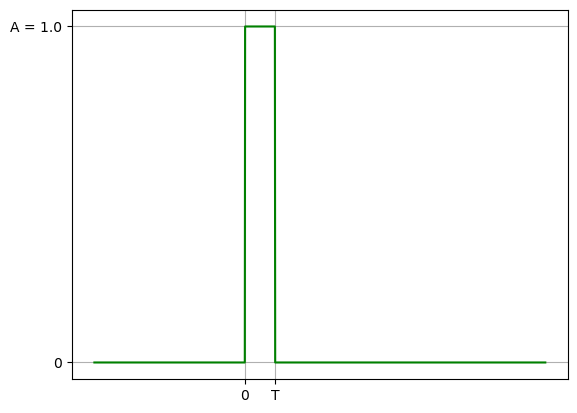

In [6]:
color='green'
x_tick_positions_list = [0, T]
x_tick_labels_list = ['0', 'T']
y_tick_positions_list = [0, A]
y_tick_labels_list = ['0', 'A = ' + str(A)]
plt.plot(t_array, g_t_array, color=color)
plt.xticks(ticks=x_tick_positions_list, labels=x_tick_labels_list)
plt.yticks(ticks=y_tick_positions_list, labels=y_tick_labels_list)
plt.grid(True)
plt.show()

$\newline$
$\newline$


##### ${\color{blue}{\; \; \; \; \; \text{BPSK Modulation:}}}$


$\newline$
$\newline$

$\newline$
$\newline$


$\color{}{\text{For }BPSK\text{ Modulation:}}$

$\newline$
$\newline$

<center>$\color{}{s_{m}(t) \; = \; g(t) \cos 2\pi [f_{c}t + \frac{m - 1}{M = 2}]}$</center>

$\newline$
$\newline$

In [7]:
def S_m_Generator(an: np.array, Eg: float, T: float, fc: float=1e3, M: int=2) -> np.array:

    if fc != 0:
        step = 0.01 * (1/fc) # step << 1/fc
    else:
        step = 0.01
        
    t_array = np.arange(start=0, stop=T, step=step)
    m_array = m_Generator(an=an)
    g_t_array = g_Rect_Generator(t_array=t_array, Eg=Eg, T=T)
    s_m_list = []
    s_l_list = []
    t_list = []
    fixed_exp = np.exp(1j*2*np.pi*fc*t_array)
    for i, m in enumerate(m_array):

        variable_phase = (m - 1) / M
        s_l_symbol = g_t_array * np.exp(1j*2*np.pi*(m-1)/M)
        s_m_symbol = np.real(s_l_symbol*fixed_exp)
        s_l_list.extend(s_l_symbol)
        s_m_list.extend(s_m_symbol)
        t_list.extend(i*T + t_array)

    s_l_array = np.array(s_l_list)
    s_m_array = np.array(s_m_list)
    T_array = t_array
    
    return s_l_array, s_m_array, np.array(t_list), T_array, step

In [8]:
num_symbols = 5
an = an_Generator(num_messages=num_symbols)
m_array = m_Generator(an=an)
T = 1
T = float(T)
Eg = 1
Eg = float(Eg)
A = np.sqrt(Eg / T)
fc = 2
fc = float(fc)
s_l_t_array, s_m_t_array, t_array, T_array, step = S_m_Generator(an=an, Eg=Eg, T=T, fc=fc)

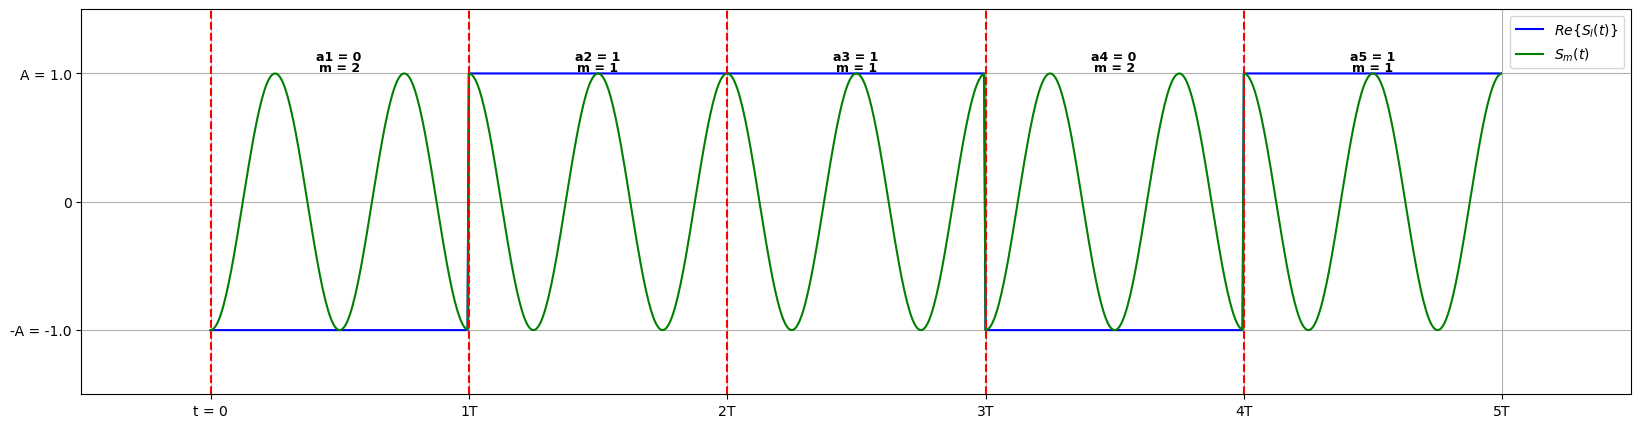

In [9]:
color1 = 'green'
color2 = 'red'
color3 = 'black'
color4 = 'blue'
plt.figure(figsize=(20, 5))
plt.plot(t_array, np.real(s_l_t_array), color=color4, label='$Re\{S_{l}(t)\}$')
plt.plot(t_array, s_m_t_array, color=color1, label='$S_{m}(t)$')
y_tick_positions_list = [-A, 0, A]
y_tick_labels_list = ['-A = ' + str(-A), '0', 'A = ' + str(A)]
x_tick_labels_list = ['t = 0']
x_tick_positions_list = [0]
for i in range(num_symbols):
    plt.axvline(x=i*T, color=color2, linestyle='--')
    x_tick_positions_list.append((i + 1)*T)
    x_tick_labels_list.append(str(int((i + 1)*T)) + 'T')
    plt.text((i + 0.42)*T, A + 0.02, f'm = {m_array[i]}', fontsize=9, color=color3, fontweight='bold')
    plt.text((i + 0.41)*T, A + 0.1, f'a{i + 1} = {an[i]}', fontsize=9, color=color3, fontweight='bold')

plt.grid(True)
plt.xticks(ticks=x_tick_positions_list, labels=x_tick_labels_list)
plt.yticks(ticks=y_tick_positions_list, labels=y_tick_labels_list)
plt.axis([-0.5*T, (num_symbols + 0.5)*T, -(A + 0.5), (A + 0.5)])
plt.legend()
plt.show()

$\newline$
$\newline$


##### ${\color{blue}{\; \; \; \; \; \text{Tapped-Delay-Line Channel Model:}}}$


$\newline$
$\newline$

$\newline$
$\newline$

$\color{}{\text{When the }{c_{n}(t)}\text{ are Gaussian random processes, they are statistically independent.}}$

$\newline$
$\newline$

<center>$\color{}{\; \Rightarrow \; {c_{n}(t)} \sim \mathcal{N}(\mu, \sigma^{2}), (iid)} \; \Rightarrow \;  \color{}{{\left \{ \begin{array}{ll}  Re\{c_{n}(t)\} \sim \frac{\sqrt{2}}{2}\mathcal{N}(\mu, \sigma^{2}) \\ Im\{c_{n}(t)\} \sim \frac{\sqrt{2}}{2}\mathcal{N}(\mu, \sigma^{2}) \; \end{array} \right.}} \; \xrightarrow{\; if \; \sigma^{2} = 1 , \; \mu = 0\;} \; \color{}{{\left \{ \begin{array}{ll}  Re\{c_{n}(t)\} \sim \frac{\sqrt{2}}{2}\mathcal{N}(0, 1) \\ Im\{c_{n}(t)\} \sim \frac{\sqrt{2}}{2}\mathcal{N}(0, 1) \; \end{array} \right.}}$</center>

$\newline$
$\newline$

<center>$\mu_{c_{n}(t)} = \mu_{Re\{ c_{n}(t) \}} + j \mu_{Im\{ c_{n}(t) \}}$</center>

$\newline$
$\newline$

<center>$\sigma^{2}_{c_{n}(t)} = \sigma^{2}_{Re\{ c_{n}(t) \}} +  \sigma^{2}_{Im\{ c_{n}(t) \}}$</center>

$\newline$
$\newline$

In [10]:
def c_t_Generator(n_t: int, mode: str, u: complex=0, sigma: float=1) -> dict: # sigma is standard deviation, n_t is the size of t_array

    u_Re, u_Im = u.real, u.imag
    c_dict = {}
    if mode == 'static':
        np.random.seed(0)

    elif mode == 'dynamic':
        pass
        

    random_array = np.random.randn(2, n_t) # randn is standard distribution
    c_Re = (np.sqrt(2) / 2) * sigma * random_array[0] + u_Re
    c_Im = (np.sqrt(2) / 2) * sigma * random_array[1] + u_Im
    c_t_array = c_Re + 1j*c_Im

    return c_t_array

In [11]:
def z_t_Generator(n_t: int, mode: str, u: complex=0, sigma: float=1) -> np.array: # n_t is the size of the t_array, sigma is standard deviation

    if mode == 'static':
        np.random.seed(0)
        
    elif mode == 'dynamic':
        pass
        
    u_Re, u_Im = u.real, u.imag
    z_t_Re = (np.sqrt(2) / 2) * sigma * np.random.randn(n_t) + u_Re
    z_t_Im = (np.sqrt(2) / 2) * sigma * np.random.randn(n_t) + u_Im
    z_t_complex = z_t_Re + 1j * z_t_Im

    return z_t_complex

$\newline$
$\newline$

$\color{}{\text{For received low pass signal we will have:}}$

$\newline$
$\newline$

<center>$\color{}{r_{l}(t) = [\sum\limits_{k = 1}^{L}c_{k}(t)s_{li}(t-\frac{k}{W})] + z(t) \;\;\;\; \stackrel{W = \frac{1}{T}}{\Rightarrow} \;\;\;\; [\sum\limits_{k = 1}^{L}c_{k}(t)s_{li}(t-kT)] + z(t)} = v_{i}(t) + z(t), \;\;\;\; 0 \leq t \leq T, \;\;\;\; i = 1, 2$</center>

$\newline$
$\newline$

> ${\color{red}{\text{Note: }}}$
> 
>>
>> $\color{}{T: \; Symbol \; Duration}$
>>
>> $\color{}{W=\frac{1}{T_{s}}: Sampling \; Frequency}$
>>
>>


$\newline$
$\newline$

In [12]:
def Symbol_Right_Shifter(s_l_array: np.array, k: int) -> np.array:

    n_T = len(s_l_array)
    s_l_long_array = s_l_array
    if k == 0:
        s_l_shifted_array = s_l_array

    else:
        s_l_shifted_array = np.concatenate((np.zeros(k), s_l_array[:-k]))

    return s_l_shifted_array

In [13]:
def v_i_t_Generator(s_l_t: np.array, L: int) -> np.array:

    n_T = len(s_l_t)
    c_k_t = c_t_Generator(n_t=n_T, mode='static')
    out_array = np.zeros(n_T, dtype=complex)
    for k in range(1, L+1):

        s_l_t_k_nT = Symbol_Right_Shifter(s_l_array=s_l_t, k=k)
        out_array += c_k_t * s_l_t_k_nT

    return out_array

In [14]:
def r_l_t_Generator(v_i_t_array: np.array) -> np.array:

    n_t = len(v_i_t_array)
    z_t_array = z_t_Generator(n_t=n_t, mode='static')
    r_l_t_array = v_i_t_array + z_t_array

    return r_l_t_array

$\newline$
$\newline$


##### ${\color{blue}{\; \; \; \; \; \text{Rake Demodulator:}}}$


$\newline$
$\newline$

$\newline$
$\newline$

> $\color{red}{\text{Note:}}$
>>
>> $\color{}{\text{At first, we assume that the }c_{k}(t)\text{ is known and with this assumption, we will have the following:}}$

$\newline$
$\newline$

In [15]:
num_symbols = 5
an = an_Generator(num_messages=num_symbols)
m_array = m_Generator(an=an)
T = 1
T = float(T)
Eg = 1
Eg = float(Eg)
fc = 2
fc = float(fc)
s_l_t_array, s_m_t_array, t_array, T_array, step = S_m_Generator(an=an, Eg=Eg, T=T, fc=fc)

In [16]:
M = 2
m1 = 1
m2 = 2
L = 10
g_t = g_Rect_Generator(t_array=T_array, Eg=Eg, T=T)
s_l_1 = g_t * np.exp(1j*2*np.pi*(m1 - 1)/M)
s_l_2 = g_t * np.exp(1j*2*np.pi*(m2 - 1)/M)
v_1 = v_i_t_Generator(s_l_t=s_l_1, L=L)
v_2 = v_i_t_Generator(s_l_t=s_l_2, L=L)
r_l_1 = r_l_t_Generator(v_i_t_array=v_1)
r_l_2 = r_l_t_Generator(v_i_t_array=v_2)

$\newline$
$\newline$

<center>$\color{}{U_{m} = Re[ \; \int_{0}^{T}r_{l}(t)v_{m}^{*}(t) \; dt \; ] = Re[ \; \sum\limits_{k = 1}^{L}  \int_{0}^{T} r_{l}(t) c_{k}^{*}(t) s_{m}^{*}(t - \frac{k}{W}) \; ]}$</center>

$\newline$
$\newline$

In [17]:
def Um_Generator(r_l_t: np.array, T_array: np.array, Eg: float, T: float, L: int, step: float, mode: str) -> dict:

    n_t = len(T_array)
    n_r = len(r_l_t)
    if n_t != n_r:
        raise ValueError(f'Shape of the r_l_t and T array must be equal, r_l_t.shape = {r_l_t.shape}, T_array.shape = {T_array.shape}')
        
    g_t = g_Rect_Generator(t_array=T_array, Eg=Eg, T=T)
    M, m1, m2 = 2, 1, 2
    s_l_1 = g_t * np.exp(1j*2*np.pi*(m1 - 1)/M)
    s_l_2 = g_t * np.exp(1j*2*np.pi*(m2 - 1)/M)
    c_k_t = c_t_Generator(n_t=n_t, mode=mode)
    v_1 = v_i_t_Generator(s_l_t=s_l_1, L=L)
    v_2 = v_i_t_Generator(s_l_t=s_l_2, L=L)

    U_dict = {}
    U1 = (step * (r_l_t * np.conj(v_1)).sum()).real
    U2 = (step * (r_l_t * np.conj(v_2)).sum()).real
    U_dict['U1'], U_dict['U2'] = U1, U2

    return U_dict

In [18]:
mode = 'static'
Um_for_r_l_1 = Um_Generator(r_l_t=r_l_1, T_array=T_array, Eg=Eg, T=T, L=L, step=step, mode=mode)
Um_for_r_l_2 = Um_Generator(r_l_t=r_l_2, T_array=T_array, Eg=Eg, T=T, L=L, step=step, mode=mode)

In [19]:
print(f'\n{colored(f"When we transmit the s1,2 and receive receive r1,2:", "blue", attrs=["bold"])}\n')
U1, U2 = Um_for_r_l_1['U1'], Um_for_r_l_1['U2']
print(f'\n {colored(f"r1: U1 = {U1: 0.2f}, U2 = {U2: 0.2f}", "black", attrs=["bold"])} \n')

U1, U2 = Um_for_r_l_2['U1'], Um_for_r_l_2['U2']
print(f'\n {colored(f"r2: U1 = {U1: 0.2f}, U2 = {U2: 0.2f}", "black", attrs=["bold"])} \n')


When we transmit the s1,2 and receive receive r1,2:


 r1: U1 =  102.81, U2 = -102.81 


 r2: U1 = -83.95, U2 =  83.95 



$\newline$
$\newline$
> $\color{red}{\bf{Conclusion:}}$
>> 
>> $\color{}{\text{As we can see demodulation done correctly}}$

$\newline$
$\newline$

$\newline$
$\newline$


##### ${\color{blue}{\; \; \; \; \; \bf{\text{Exploring the }L\text{ (No. of taps or fingers):}}}}$


$\newline$
$\newline$

In [20]:
num_symbols = 5
an = an_Generator(num_messages=num_symbols)
m_array = m_Generator(an=an)
T = 1
T = float(T)
Eg = 1
Eg = float(Eg)
fc = 2
fc = float(fc)
s_l_t_array, s_m_t_array, t_array, T_array, step = S_m_Generator(an=an, Eg=Eg, T=T, fc=fc)

In [22]:
mode = 'static'
L_list = list(range(1, 21))
out_r1_list = []
out_r2_list = []
L_ticks_list = []
for L in L_list:

    L_ticks_list.append(f'L = {L}')
    
    Um_for_r_l_1 = Um_Generator(r_l_t=r_l_1, T_array=T_array, Eg=Eg, T=T, L=L, step=step, mode=mode)
    out_r1_list.append(Um_for_r_l_1['U1'] - Um_for_r_l_1['U2'])
    
    Um_for_r_l_2 = Um_Generator(r_l_t=r_l_2, T_array=T_array, Eg=Eg, T=T, L=L, step=step, mode=mode)
    out_r2_list.append(Um_for_r_l_2['U2'] - Um_for_r_l_2['U1'])

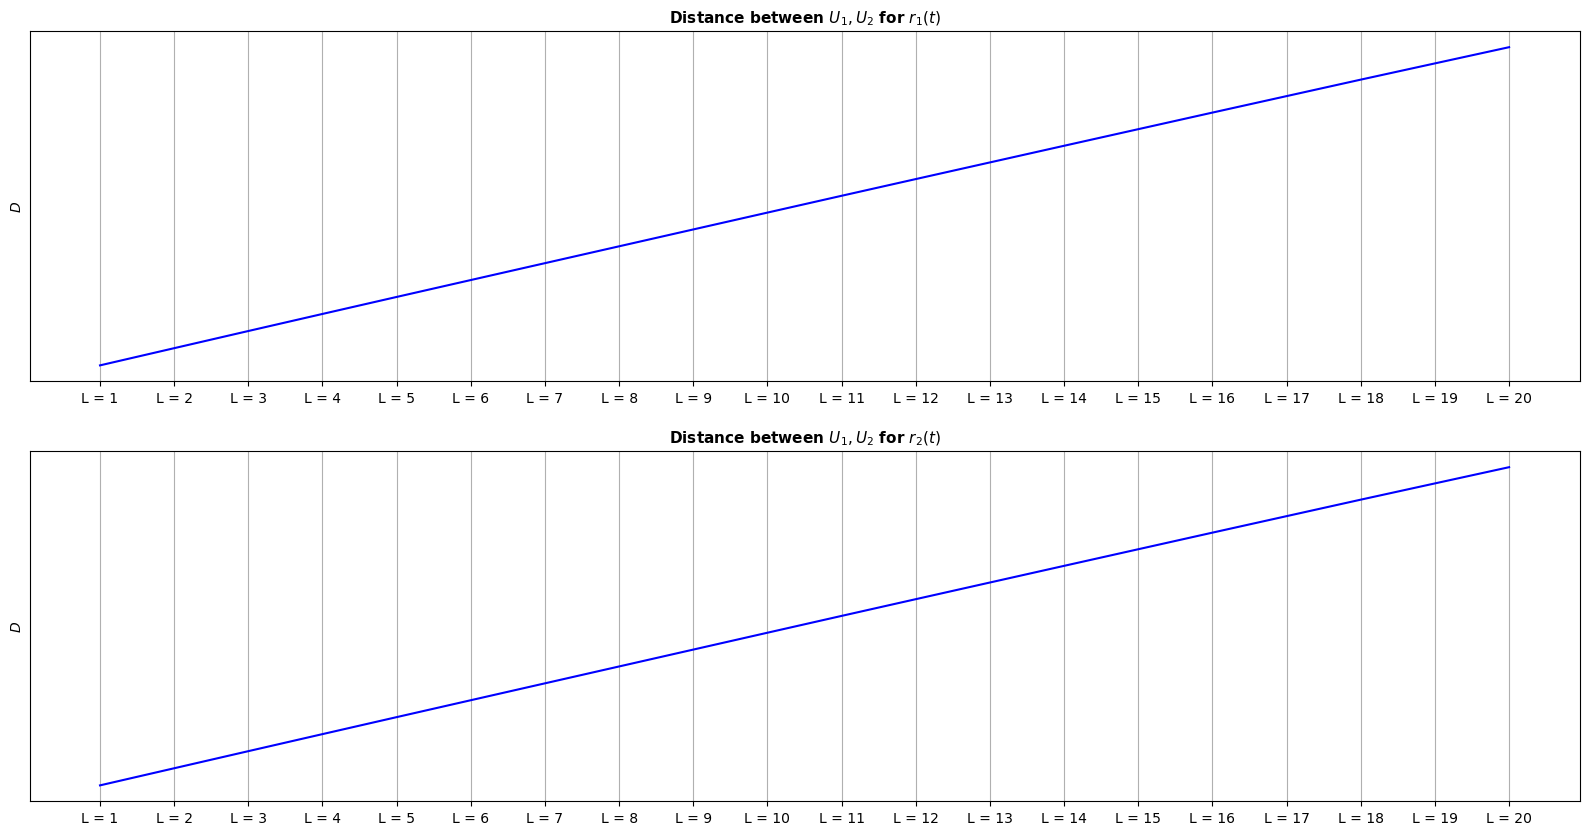

In [23]:
color = 'blue'
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(L_list, out_r1_list, color=color)
plt.xticks(ticks=L_list, labels=L_ticks_list), plt.yticks([]), plt.ylabel('$D$'), plt.title('Distance between $U_{1}, U_{2}$ for $r_{1}(t)$', fontsize=11, fontweight="bold")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(L_list, out_r2_list, color=color)
plt.xticks(ticks=L_list, labels=L_ticks_list), plt.yticks([]), plt.ylabel('$D$'), plt.title('Distance between $U_{1}, U_{2}$ for $r_{2}(t)$', fontsize=11, fontweight="bold")
plt.grid(True)

plt.show()

$\newline$
$\newline$
> $\color{red}{\bf{Conclusion:}}$
> 
>>
>> 
>> $\color{}{\text{When we assumed that the }c_{k}(t)\text{ is known, as we can see increasing the }L\text{ (No. Taps or fingers) parameter increases}}$
>>
>>
>> $\color{}{\text{the distance between }U_{1}, \; U_{2}\text{ linearly, and decreasing the error probability will be probable.}}$


$\newline$
$\newline$

$\newline$
$\newline$


##### ${\color{blue}{\; \; \; \; \; \text{Correlation Coefficient between Modulated Symbols }s_{m=1}, s_{m=2} :}}$


$\newline$
$\newline$

In [24]:
num_symbols = 5
an = an_Generator(num_messages=num_symbols)
m_array = m_Generator(an=an)
T = 1
T = float(T)
Eg = 1
Eg = float(Eg)
fc = 2
fc = float(fc)
s_l_t_array, s_m_t_array, t_array, T_array, step = S_m_Generator(an=an, Eg=Eg, T=T, fc=fc)

In [25]:
n_t = len(T_array)
s_m_t_1 = s_m_t_array[:n_t]
s_m_t_2 = s_m_t_array[n_t:2*n_t]

In [27]:
corr_coef_mat = np.corrcoef(s_m_t_1, s_m_t_2)
print(f'\n{colored(f"Correlation Coefficient Matrix = ", "blue", attrs=["bold"])}')
print(f'\n{colored(f"{corr_coef_mat}", "black", attrs=["bold"])}')


Correlation Coefficient Matrix = 

[[ 1. -1.]
 [-1.  1.]]


$\newline$
$\newline$
> $\color{red}{\bf{Conclusion:}}$
> 
>>
>> $\color{}{\Rightarrow \rho_{r} = -1}$



$\newline$
$\newline$

$\newline$
$\newline$


##### ${\color{blue}{\; \; \; \; \; \text{References:}}}$




$\newline$
$\newline$


- <a name=''>${\color{black}{\bf{Book:}}} {\text{ Proakis, John G. Digital Communications. 5th ed. New York: McGraw Hill, 2007.}}$</a>



$\newline$
$\newline$